In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.patches as mpatches

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'code')
from help_funcs import *

In [2]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

In [43]:
import scipy.stats
def getStimRateMeans(exc_spikes, exc_positions, rates=False, nsecs = 5, binlen = 40):
    # store the control times and the chr2 stimulation times
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500 + 1000
        stop_time = start_time + binlen
        if stop_time > nsecs*1000: break
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        
    assert len(control_times) == len(chr_times)
#     print("NTIMES:", control_times, chr_times)
    # compute the rates of the cells distal to the chr2 stimulus
    control_spikes = []
    chr_spikes = []
    for ni in range(len(exc_positions)):

        nspikes = 0
        for tim in control_times:
            aa = exc_spikes[ni] [exc_spikes[ni] > tim ]
            aa = aa [aa < tim+binlen]
            nspikes += len(aa)
        control_spikes.append(nspikes)

        nspikes = 0
        for tim in chr_times:
            aa = exc_spikes[ni] [exc_spikes[ni] > tim ]
            aa = aa [aa < tim+binlen]
            nspikes += len(aa)
        chr_spikes.append(nspikes)
    control_rates = np.divide(control_spikes,(binlen/1000)*len(control_times)) # convert from spike count to rate
    chr_rates = np.divide(chr_spikes,(binlen/1000)*len(chr_times))
    ctrl_mean = np.mean(control_rates)
    chr2_mean = np.mean(chr_rates)
    
    ctrl_err = np.std(control_rates)
    chr2_err = np.std(chr_rates)
    
    if rates:
        return [ctrl_mean, chr2_mean, ctrl_err, chr2_err, control_rates, chr_rates]
    else:
        return [ctrl_mean, chr2_mean, ctrl_err, chr2_err]
    
def getStimRateMeansCtrl(exc_spikes, exc_positions, rates=False, nsecs = 5, binlen = 40):
    # store the control times and the chr2 stimulation times
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500 + 1000
        stop_time = start_time + binlen
        if stop_time > nsecs*1000: break
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        
    assert len(control_times) == len(chr_times)
#     print("NTIMES:", control_times, chr_times)
    # compute the rates of the cells distal to the chr2 stimulus
    control_spikes = []
    chr_spikes = []
    for ni in range(len(exc_positions)):

        nspikes = 0
        for tim in control_times:
            aa = exc_spikes[ni] [exc_spikes[ni] > tim ]
            aa = aa [aa < tim+binlen]
            nspikes += len(aa)
        control_spikes.append(nspikes)

        nspikes = 0
        for tim in chr_times:
            aa = exc_spikes[ni] [exc_spikes[ni] > tim ]
            aa = aa [aa < tim+binlen]
            nspikes += len(aa)
        chr_spikes.append(nspikes)
    control_rates = np.divide(control_spikes,(binlen/1000)*len(control_times)) # convert from spike count to rate
    chr_rates = np.divide(chr_spikes,(binlen/1000)*len(chr_times))
    
    control_rates = np.concatenate( [control_rates, chr_rates])
    
    ctrl_mean = np.mean(control_rates)
    
    ctrl_err = np.std(control_rates)

    return [ctrl_mean, ctrl_err]
    

def getSpontMedians(all_spikes, start_time = 1000., stop_time = 10000.):
    
    exc_spikes = all_spikes[:8000]
    pv_spikes = all_spikes[8000:9000]
    sst_spikes = all_spikes[9000:]
    
    tlen = (stop_time - start_time)/1000.
    
    exc_nspikes = []
    for spikes in exc_spikes:
        aa = spikes[spikes > start_time ]
        aa = aa [aa < stop_time]
        exc_nspikes.append(len(aa)/tlen)
        
    pv_nspikes = []
    for spikes in pv_spikes:
        aa = spikes[spikes > start_time ]
        aa = aa [aa < stop_time]
        pv_nspikes.append(len(aa)/tlen)
        
    sst_nspikes = []
    for spikes in sst_spikes:
        aa = spikes[spikes > start_time ]
        aa = aa [aa < stop_time]
        sst_nspikes.append(len(aa)/tlen)
        
    return np.median(exc_nspikes), np.median(pv_nspikes), np.median(sst_nspikes)

In [77]:
folder = 'eb4h/results_3'
cond = 'Spont'
with open(f'data/{folder}/{cond}_spikes.pickle','rb') as f:
    all_spikes = pickle.load(f)
    
with open(f'data/{folder}/{cond}_positions.pickle','rb') as f:
    all_positions = pickle.load(f)
    
control_means = []
control_stds = []
for xi in range(10):
    for yi in range(10):
        xpos = 0.1*xi
        ypos = 0.1*yi

        ids = []

        for ni in range(8000):
            if xpos <= all_positions[ni,0] < xpos + 0.1 and  ypos <= all_positions[ni,1] < ypos + 0.1:
                ids.append(ni)

        selected_spikes = [all_spikes[ni] for ni in ids]
        selected_positions = all_positions[ids]

        ctrlrate, ctrlerr = getStimRateMeansCtrl(selected_spikes, selected_positions)
        
        control_means.append(ctrlrate)
        control_stds.append(ctrlerr)
        
# folder = 'eb4h/results_2'
cond = 'SOM_0.33'
with open(f'data/{folder}/{cond}_spikes.pickle','rb') as f:
    all_spikes = pickle.load(f)
    
with open(f'data/{folder}/{cond}_positions.pickle','rb') as f:
    all_positions = pickle.load(f)
    
pv_ctrl = []
pv_stim = []
iii=0
for xi in range(10):
    for yi in range(10):
        xpos = 0.1*xi
        ypos = 0.1*yi

        ids = []

        for ni in range(8000):
            if xpos <= all_positions[ni,0] < xpos + 0.1 and  ypos <= all_positions[ni,1] < ypos + 0.1:
                ids.append(ni)

        selected_spikes = [all_spikes[ni] for ni in ids]
        selected_positions = all_positions[ids]

        pv_crate, pv_srate, pv_cerr, pv_serr = getStimRateMeans(selected_spikes, selected_positions)
        print(pv_crate, pv_srate)
        pv_ctrl.append((pv_crate-control_means[iii])/control_stds[iii])
        pv_stim.append((pv_srate-control_means[iii])/control_stds[iii])
        iii+=1

1.7857142857142858 0.13736263736263737
2.2270114942528734 0.14367816091954022
2.7298850574712645 0.7902298850574713
2.9965753424657535 1.5410958904109588
4.367469879518072 1.430722891566265
4.56989247311828 1.814516129032258
4.119318181818182 1.3494318181818181
4.430379746835443 0.7911392405063291
1.7241379310344827 0.43103448275862066
1.6176470588235294 0.8088235294117647
1.1363636363636365 0.2435064935064935
2.3734177215189876 0.9493670886075949
2.60989010989011 1.098901098901099
6.793478260869565 5.615942028985507
9.375 6.578947368421052
9.210526315789474 5.838815789473684
8.984375 3.984375
4.75 1.3333333333333333
2.483974358974359 0.8814102564102564
2.113970588235294 0.6433823529411765
2.6785714285714284 0.9821428571428571
5.597014925373134 0.9328358208955224
12.725903614457831 7.906626506024097
29.25257731958763 22.938144329896907
25.071022727272727 21.09375
24.833333333333332 20.083333333333332
25.694444444444443 18.98148148148148
12.07865168539326 7.584269662921348
4.77528089887

In [78]:
results = scipy.stats.linregress(pv_ctrl, pv_stim)

In [79]:
results.slope

0.8923194653488414

Text(0.5, 1.0, 'PV')

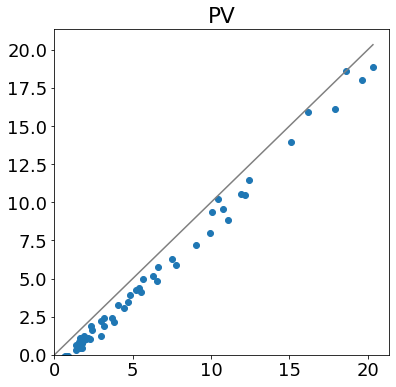

In [76]:
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(pv_ctrl, pv_stim)
maxrate = np.max(pv_ctrl)
ax.plot([0,maxrate], [0,maxrate], c='gray')

ax.set_xlim(0)
ax.set_ylim(0)
plt.title('PV')

Text(0.5, 1.0, 'SST')

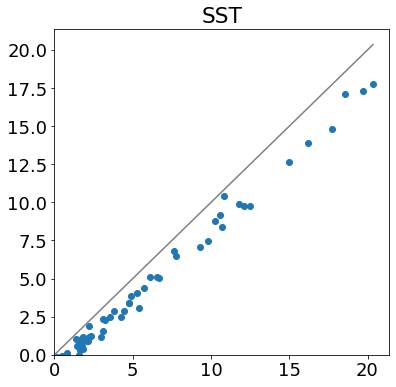

In [80]:
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(pv_ctrl, pv_stim)
maxrate = np.max(pv_ctrl)
ax.plot([0,maxrate], [0,maxrate], c='gray')

ax.set_xlim(0)
ax.set_ylim(0)
plt.title('SST')